## IMPORT OF LIBRARIES - XGBoost Regressor


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import ipywidgets as widgets
from IPython.display import display


## Defining the file and uploading it via pandas (always check for index_col)

In [2]:
file_path = 'C:/Users/42073/Desktop/_Python/Datasety/Salary_dataset.csv'
df = pd.read_csv(file_path, index_col=0)

# Working with the dataset and preparation for data cleaning part

In [3]:
df.head(10)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [22]:
df.shape


(30, 2)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Experience  30 non-null     float64
 1   Salary      30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


In [19]:
df.describe()

,Experience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [20]:
df.isnull().sum()

Experience    0
Salary        0
dtype: int64

In [21]:
df.nunique()

Experience    28
Salary        30
dtype: int64

In [4]:
df.rename(columns={'YearsExperience': 'Experience'}, inplace=True)

# Preparation for machine learning process
## X is everything we want to consider as influencing factor for our prediciton Y

In [5]:
# Extract features and target variable
x = df['Experience']
y = df['Salary']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Choosing the model

In [7]:
# Create an XGBoost regression model
model = XGBRegressor()



# Visualization of the models characteristics

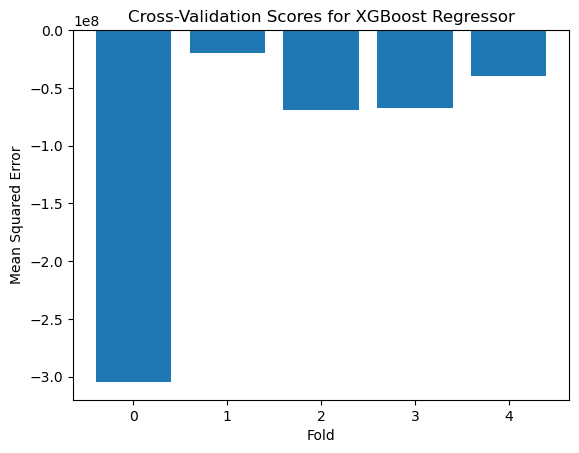

In [8]:
scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
#plt.figure(figsize=(8, 6))
plt.bar(range(len(scores)), scores)
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.title('Cross-Validation Scores for XGBoost Regressor')
plt.show()

# Model fitting

In [9]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# Model prediction and score evaluation

In [10]:
predictions = model.predict(x_test)

In [11]:
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 101047806.01054382
Mean Absolute Error: 8640.13671875
R-squared: 0.802175786084608


# Regression chart with data points and normal lin. regression and XGB regression

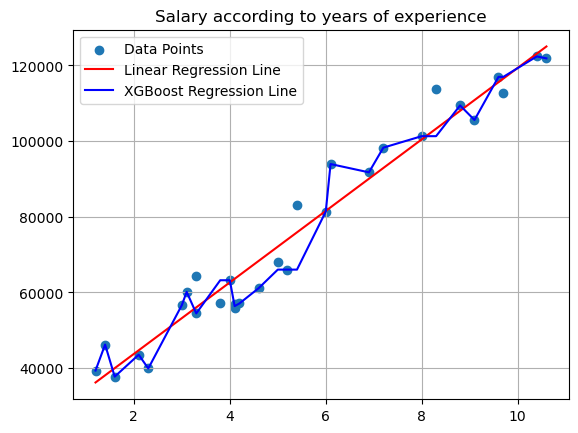

In [12]:
coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients
regression_line = slope * x + intercept

plt.scatter(x, y, label='Data Points')
plt.plot(x, regression_line, color='red', label='Linear Regression Line')
plt.plot(x, model.predict(x), color='blue', label='XGBoost Regression Line')
plt.title("Salary according to years of experience")
plt.legend()
plt.grid(True)
plt.show()

# Interactive prediction with slider

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Assuming you have already defined 'x', 'y', and 'model'

# Perform linear regression
coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients
regression_line = slope * x + intercept

# Create a function to update the plot based on the input value
def update_plot(input_x):
    # Predict using the regression model
    predicted_y = model.predict(input_x)
    predicted_y = predicted_y[0]  # Unpack the predicted value from the array

    plt.figure()
    plt.scatter(x, y, label='Data Points')
    plt.plot(x, regression_line, color='red', label='Linear Regression Line')
    #plt.plot(x, model.predict(x), color='green', label='XGBoost Regression Line')
    plt.plot(input_x, predicted_y, 'o', color='blue', markersize=8, label='Model Prediction')
    plt.annotate(f'Prediction: {predicted_y:.2f}$', (input_x, predicted_y),
                 textcoords="offset points", xytext=(-20, 10),
                 arrowprops=dict(arrowstyle="->", color="blue"))

    plt.title("Salary according to years of experience")
    plt.xlabel("Years of Experience")
    plt.ylabel("Salary")
    plt.legend()
    plt.grid(True)
    plt.show()

# Create an interactive widget for input
input_widget = widgets.FloatSlider(value=1, min=min(x), max=max(x), step=0.1, description='Input X:')
interactive_plot = widgets.interactive(update_plot, input_x=input_widget)

# Display the interactive plot
display(interactive_plot)

interactive(children=(FloatSlider(value=1.2000000000000002, description='Input X:', max=10.6, min=1.2000000000…

# Interactive prediction with input box

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Assuming you have already defined 'x', 'y', and 'model'

# Perform linear regression
coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients
regression_line = slope * x + intercept

# Create a function to update the plot based on the input value
def update_plot(input_x):
    # Predict using the regression model
    predicted_y = model.predict([[input_x]])
    predicted_y = predicted_y[0]  # Unpack the predicted value from the array

    plt.figure()
    plt.scatter(x, y, label='Data Points')
    plt.plot(x, regression_line, color='red', label='Linear Regression Line')
    plt.plot(input_x, predicted_y, 'o', color='blue', markersize=8, label='Model Prediction')
    plt.annotate(f'Prediction: {predicted_y:.2f}$', (input_x, predicted_y),
                 textcoords="offset points", xytext=(-20, 10),
                 arrowprops=dict(arrowstyle="->", color="blue"))

    plt.title("Salary according to years of experience")
    plt.xlabel("Years of Experience")
    plt.ylabel("Salary")
    plt.legend()
    plt.grid(True)
    plt.show()

# Create an interactive widget for input using FloatText
input_box = widgets.FloatText(value=1, description='Input X:')
interactive_plot = widgets.interactive(update_plot, input_x=input_box)

# Display the interactive plot
display(interactive_plot)

interactive(children=(FloatText(value=1.0, description='Input X:'), Output()), _dom_classes=('widget-interact'…